In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [108]:
df=pd.read_csv('/Users/vaibhavarora/Documents/NEU/CPS/ALY 6020/Project 4/week 4 - Nashville_housing_data.csv')
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [109]:
df.shape

(22651, 26)

# Part 1: Data Cleaning

In [110]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [112]:
df['Land Use'].value_counts(normalize=True)

SINGLE FAMILY             0.944329
DUPLEX                    0.052536
RESIDENTIAL COMBO/MISC    0.001633
QUADPLEX                  0.001501
Name: Land Use, dtype: float64

In [113]:
df['Property Address'].value_counts()

2351  HERMAN ST       4
911  WARREN ST        4
1910  LINDEN AVE      4
944  SEYMOUR AVE      4
2208 24TH  AVE N      4
                     ..
3005  DELANEY DR      1
2805  RENEE DR        1
2908  WINDEMERE CT    1
303  BONNALYNN DR     1
1614 5TH  AVE N       1
Name: Property Address, Length: 20448, dtype: int64

In [114]:
df['Property City'].value_counts(normalize=True)

NASHVILLE         0.795179
MADISON           0.050598
ANTIOCH           0.050024
HERMITAGE         0.040311
OLD HICKORY       0.036381
GOODLETTSVILLE    0.019206
BRENTWOOD         0.006976
WHITES CREEK      0.000574
JOELTON           0.000486
MOUNT JULIET      0.000265
Name: Property City, dtype: float64

In [115]:
df["Sale Date"] = pd.to_datetime(df["Sale Date"])

In [116]:
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [117]:
df['year'], df['month'], df['date'] = df['Sale Date'].dt.year, df['Sale Date'].dt.month,df['Sale Date'].dt.day

In [118]:
df['Legal Reference'].value_counts()

20140403-0027868    7
20150916-0093955    7
20150805-0077719    6
20160204-0010954    5
20151002-0100496    5
                   ..
20140721-0064284    1
20140718-0063818    1
20140717-0063135    1
20140728-0067027    1
20161101-0115366    1
Name: Legal Reference, Length: 22452, dtype: int64

In [119]:
df['Sold As Vacant'].value_counts(normalize=True)

No     0.994084
Yes    0.005916
Name: Sold As Vacant, dtype: float64

In [120]:
df['Multiple Parcels Involved in Sale'].value_counts(normalize=True)

No     0.979339
Yes    0.020661
Name: Multiple Parcels Involved in Sale, dtype: float64

In [121]:
df['City'].value_counts(normalize=True)

NASHVILLE         0.795241
MADISON           0.050594
ANTIOCH           0.050020
HERMITAGE         0.040307
OLD HICKORY       0.036378
GOODLETTSVILLE    0.019204
BRENTWOOD         0.006931
WHITES CREEK      0.000574
JOELTON           0.000486
MOUNT JULIET      0.000265
Name: City, dtype: float64

In [122]:
df['State'].value_counts()

TN    22651
Name: State, dtype: int64

In [123]:
df['Acreage'].describe()

count    22651.000000
mean         0.454705
std          0.611818
min          0.040000
25%          0.200000
50%          0.280000
75%          0.460000
max         17.500000
Name: Acreage, dtype: float64

In [124]:
df['Tax District'].value_counts(normalize=True)

URBAN SERVICES DISTRICT      0.772460
GENERAL SERVICES DISTRICT    0.171339
CITY OF OAK HILL             0.015408
CITY OF FOREST HILLS         0.015231
CITY OF GOODLETTSVILLE       0.015187
CITY OF BELLE MEADE          0.009448
CITY OF BERRY HILL           0.000927
Name: Tax District, dtype: float64

In [125]:
df['Foundation Type'].value_counts(normalize=True)

CRAWL        0.627373
FULL BSMT    0.168786
PT BSMT      0.138896
SLAB         0.063179
PIERS        0.001589
TYPICAL      0.000177
Name: Foundation Type, dtype: float64

In [126]:
df['Exterior Wall'].value_counts(normalize=True)

BRICK          0.509779
FRAME          0.360735
BRICK/FRAME    0.098097
STONE          0.014525
STUCCO         0.006887
FRAME/STONE    0.004591
CONC BLK       0.004371
LOG            0.000662
METAL          0.000353
Name: Exterior Wall, dtype: float64

In [127]:
df['Grade'].value_counts(normalize=True)

C       0.716745
B       0.149883
D       0.085162
A       0.024237
X       0.021279
E       0.002516
SSC     0.000044
OFC     0.000044
AAB     0.000044
OFB     0.000044
Name: Grade, dtype: float64

In [128]:
df['Sale Price Compared To Value'].value_counts(normalize=True)

Over     0.752594
Under    0.247406
Name: Sale Price Compared To Value, dtype: float64

In [129]:
df.rename(columns=
    {"Multiple Parcels Involved in Sale":"Parcels","Property Address":"Address","Sale Price Compared To Value":"Value"}, 
    inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        22651 non-null  int64         
 1   Parcel ID         22651 non-null  object        
 2   Land Use          22651 non-null  object        
 3   Address           22649 non-null  object        
 4   Suite/ Condo   #  0 non-null      float64       
 5   Property City     22649 non-null  object        
 6   Sale Date         22651 non-null  datetime64[ns]
 7   Legal Reference   22651 non-null  object        
 8   Sold As Vacant    22651 non-null  object        
 9   Parcels           22651 non-null  object        
 10  City              22651 non-null  object        
 11  State             22651 non-null  object        
 12  Acreage           22651 non-null  float64       
 13  Tax District      22651 non-null  object        
 14  Neighborhood      2265

In [131]:
df = df.drop(['Unnamed: 0','Suite/ Condo   #','Parcel ID','Address','Legal Reference','Property City','State'], axis=1)

In [132]:
df.shape

(22651, 22)

In [133]:
df.dropna()

,Land Use,Sale Date,Sold As Vacant,Parcels,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Value,year,month,date
0,SINGLE FAMILY,2013-01-11,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,11
1,SINGLE FAMILY,2013-01-18,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000,157800,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18
2,SINGLE FAMILY,2013-01-18,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18
3,SINGLE FAMILY,2013-01-23,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,23
4,SINGLE FAMILY,2013-01-04,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,2016-10-13,No,No,ANTIOCH,0.38,URBAN SERVICES DISTRICT,6328,25000,105000,...,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over,2016,10,13
22647,SINGLE FAMILY,2016-10-26,No,No,ANTIOCH,0.27,URBAN SERVICES DISTRICT,6328,25000,142400,...,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,26
22648,SINGLE FAMILY,2016-10-28,No,No,ANTIOCH,0.23,URBAN SERVICES DISTRICT,6328,25000,159300,...,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,28
22649,SINGLE FAMILY,2016-10-28,No,No,NASHVILLE,0.15,URBAN SERVICES DISTRICT,126,40000,204100,...,2004,FRAME,B,3.0,2.0,1.0,Over,2016,10,28


In [134]:
df.shape

(22651, 22)

In [135]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64'), dtype('<M8[ns]')]

In [136]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_num.head()

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,year,month,date
0,0.17,3127,32000,134400,1149.00000,1941,2.0,1.0,0.0,2013,1,11
1,0.11,9126,34000,157800,2090.82495,2000,3.0,2.0,1.0,2013,1,18
2,0.17,3130,25000,243700,2145.60001,1948,4.0,2.0,0.0,2013,1,18
3,0.34,3130,25000,138100,1969.00000,1910,2.0,1.0,0.0,2013,1,23
4,0.17,3130,25000,86100,1037.00000,1945,2.0,1.0,0.0,2013,1,4


In [137]:
df_ob = df.select_dtypes(include = ['O'])
df_ob.head()

,Land Use,Sold As Vacant,Parcels,City,Tax District,Foundation Type,Exterior Wall,Grade,Value
0,SINGLE FAMILY,No,No,NASHVILLE,URBAN SERVICES DISTRICT,PT BSMT,BRICK,C,Over
1,SINGLE FAMILY,No,No,NASHVILLE,CITY OF BERRY HILL,SLAB,BRICK/FRAME,C,Over
2,SINGLE FAMILY,No,No,NASHVILLE,URBAN SERVICES DISTRICT,FULL BSMT,BRICK/FRAME,B,Under
3,SINGLE FAMILY,No,No,NASHVILLE,URBAN SERVICES DISTRICT,CRAWL,FRAME,C,Under
4,SINGLE FAMILY,No,No,NASHVILLE,URBAN SERVICES DISTRICT,CRAWL,FRAME,C,Under


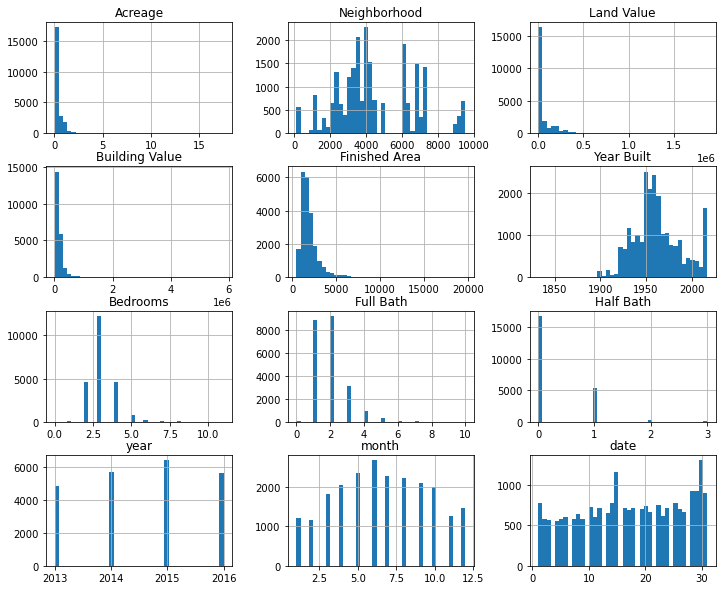

In [138]:
df_num.hist(figsize=(12, 10), bins=40);

In [139]:
df_num.describe()

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,year,month,date
count,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22650.000000,22651.000000,22648.000000,22650.000000,22543.000000,22651.000000,22651.000000,22651.000000
mean,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.377151,1961.947684,3.104910,1.887285,0.270239,2014.565008,6.597236,17.143702
std,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.094521,25.843908,0.829287,0.951220,0.480186,1.082778,3.077129,9.036739
min,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000,2014.000000,4.000000,10.000000
50%,0.280000,4026.000000,3.000000e+04,1.188000e+05,1645.824995,1959.000000,3.000000,2.000000,0.000000,2015.000000,7.000000,17.000000
75%,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.375000,1977.000000,4.000000,2.000000,1.000000,2015.000000,9.000000,25.000000
max,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000,2016.000000,12.000000,31.000000


In [140]:
df_skew=df[["Land Value","Building Value","Finished Area","Acreage"]]

In [141]:
df_skew

,Land Value,Building Value,Finished Area,Acreage
0,32000,134400,1149.00000,0.17
1,34000,157800,2090.82495,0.11
2,25000,243700,2145.60001,0.17
3,25000,138100,1969.00000,0.34
4,25000,86100,1037.00000,0.17
...,...,...,...,...
22646,25000,105000,1758.00000,0.38
22647,25000,142400,2421.00000,0.27
22648,25000,159300,3117.00000,0.23
22649,40000,204100,1637.00000,0.15


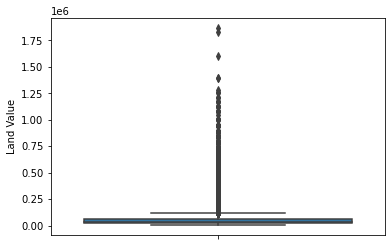

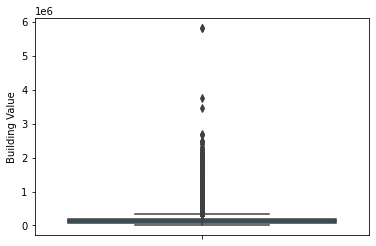

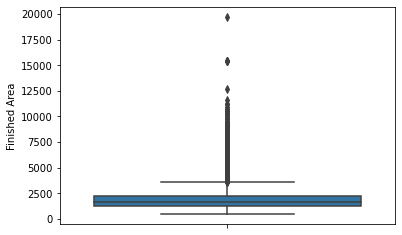

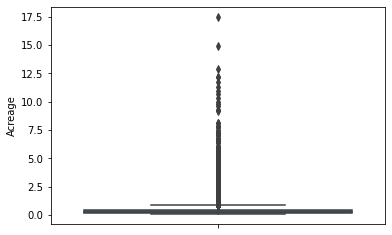

In [142]:
for column in df_skew.columns:
    plt.figure() 
    sns.boxplot(y=column,data=df_skew)

In [143]:
df.shape

(22651, 22)

In [144]:
mean_lv = np.mean(df["Land Value"])
sigma_lv = np.std(df["Land Value"])
print("Mean - Land Value: {:.2f}".format(mean_lv))
print("Standard - Deviation Land Value: {:.2f}".format(sigma_lv))

Mean - Land Value: 70137.97
Standard - Deviation Land Value: 102901.23


In [145]:
lower_range_lv = mean_lv-(2*sigma_lv)
upper_range_lv = mean_lv+(2*sigma_lv)
print("Good data for Land Value should lie between {:.2f} and {:.2f}".format(lower_range_lv, upper_range_lv))

Good data for Land Value should lie between -135664.50 and 275940.43


In [146]:
outliers_lv = [i for i in df["Land Value"] if i<lower_range_lv or i>upper_range_lv]
print("Number of outliers:",len(outliers_lv))

Number of outliers: 990


In [147]:
df.drop(df[(df["Land Value"]<lower_range_lv) | (df["Land Value"]>upper_range_lv)].index, inplace=True)

In [148]:
mean_bv = np.mean(df["Building Value"])
sigma_bv = np.std(df["Building Value"])
lower_range_bv = mean_bv-(2*sigma_bv)
upper_range_bv = mean_bv+(2*sigma_bv)
outliers_bv = [i for i in df["Building Value"] if i<lower_range_bv or i>upper_range_bv]
df.drop(df[(df["Building Value"]<lower_range_bv) | (df["Building Value"]>upper_range_bv)].index, inplace=True)
print("Number of outliers:",len(outliers_bv))

Number of outliers: 918


In [149]:
mean_fa = np.mean(df["Finished Area"])
sigma_fa = np.std(df["Finished Area"])
lower_range_fa = mean_fa-(2*sigma_fa)
upper_range_fa = mean_fa+(2*sigma_fa)
outliers_fa = [i for i in df["Finished Area"] if i<lower_range_fa or i>upper_range_fa]
df.drop(df[(df["Finished Area"]<lower_range_fa) | (df["Finished Area"]>upper_range_fa)].index, inplace=True)
print("Number of outliers:",len(outliers_fa))

Number of outliers: 890


In [150]:
mean_ac = np.mean(df["Acreage"])
sigma_ac = np.std(df["Acreage"])
lower_range_ac = mean_ac-(2*sigma_ac)
upper_range_ac = mean_ac+(2*sigma_ac)
outliers_ac= [i for i in df["Acreage"] if i<lower_range_ac or i>upper_range_ac]
df.drop(df[(df["Acreage"]<lower_range_ac) | (df["Acreage"]>upper_range_ac)].index, inplace=True)
print("Number of outliers:",len(outliers_ac))

Number of outliers: 395


In [151]:
df.shape

(19458, 22)

In [152]:
df_skew=df[["Land Value","Building Value","Finished Area","Acreage"]]

In [153]:
df_skew.shape

(19458, 4)

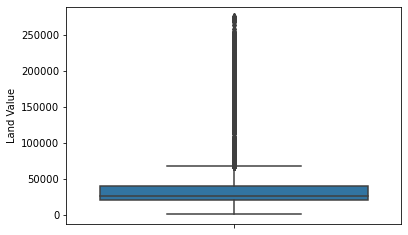

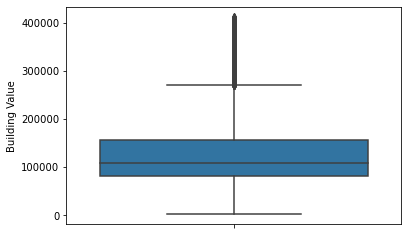

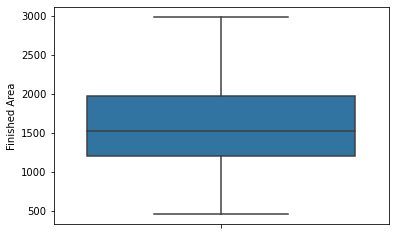

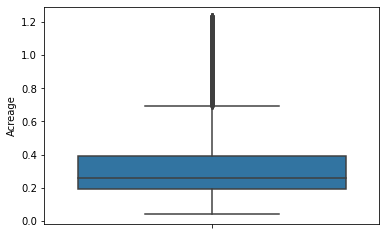

In [154]:
for column in df_skew.columns:
    plt.figure() 
    sns.boxplot(y=column,data=df_skew)

In [155]:
df['Property_Age'] = df["year"] - df["Year Built"]

In [156]:
df = df.drop(['Neighborhood','Year Built','Sale Date'], axis=1)

In [157]:
df.shape

(19458, 20)

In [158]:
#df = pd.get_dummies(df, drop_first = True, columns=['Value'])

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19458 entries, 0 to 22650
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Land Use         19458 non-null  object 
 1   Sold As Vacant   19458 non-null  object 
 2   Parcels          19458 non-null  object 
 3   City             19458 non-null  object 
 4   Acreage          19458 non-null  float64
 5   Tax District     19458 non-null  object 
 6   Land Value       19458 non-null  int64  
 7   Building Value   19458 non-null  int64  
 8   Finished Area    19457 non-null  float64
 9   Foundation Type  19458 non-null  object 
 10  Exterior Wall    19458 non-null  object 
 11  Grade            19458 non-null  object 
 12  Bedrooms         19458 non-null  float64
 13  Full Bath        19458 non-null  float64
 14  Half Bath        19359 non-null  float64
 15  Value            19458 non-null  object 
 16  year             19458 non-null  int64  
 17  month       

In [160]:
df_num = df.select_dtypes(include = ['int64','float64','uint8'])

# Exploratory Data Analysis

In [161]:
df_num.head()

,Acreage,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,year,month,date,Property_Age
0,0.17,32000,134400,1149.00000,2.0,1.0,0.0,2013,1,11,72
1,0.11,34000,157800,2090.82495,3.0,2.0,1.0,2013,1,18,13
2,0.17,25000,243700,2145.60001,4.0,2.0,0.0,2013,1,18,65
3,0.34,25000,138100,1969.00000,2.0,1.0,0.0,2013,1,23,103
4,0.17,25000,86100,1037.00000,2.0,1.0,0.0,2013,1,4,68


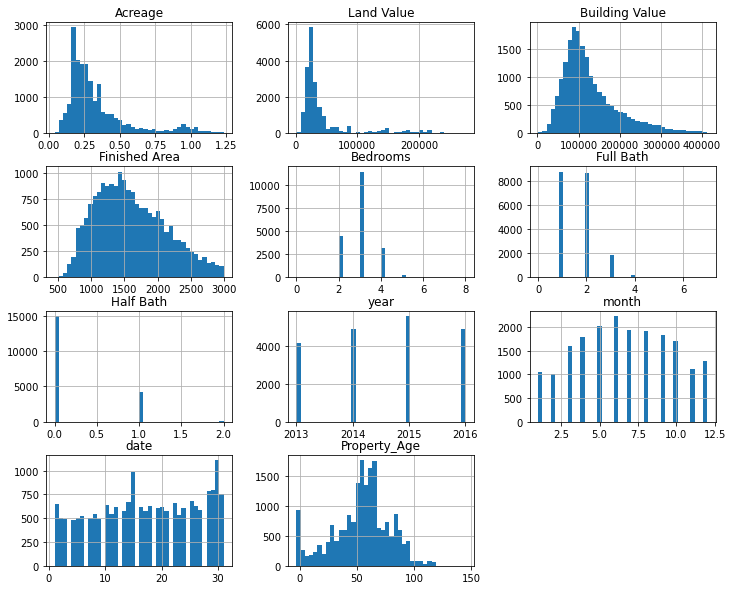

In [162]:
df_num.hist(figsize=(12, 10), bins=40);

[]

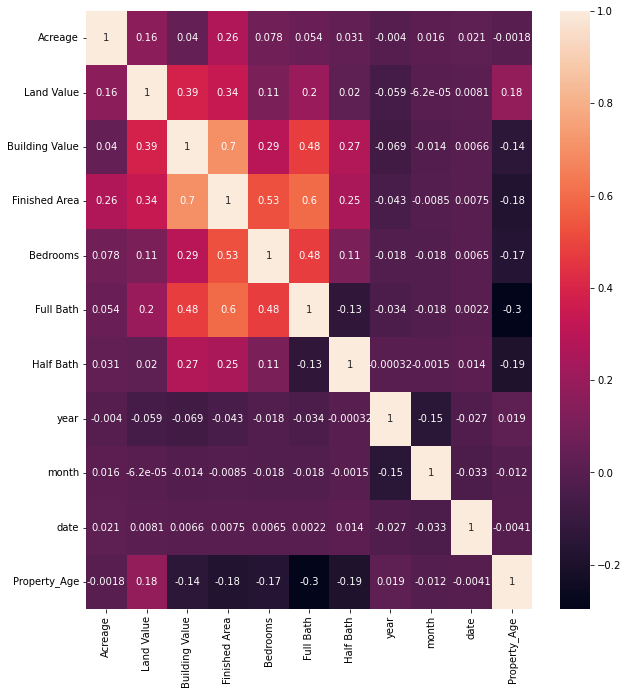

In [163]:
plt.figure(figsize=(10,11))
sns.heatmap(df_num.corr(),annot=True)
plt.plot()

In [164]:
df = df.loc[df['City'] == "NASHVILLE"]
df = df.drop(['City'], axis=1)

In [165]:
df_ob = df.select_dtypes(include = ['O'])
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15242 entries, 0 to 22650
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Land Use         15242 non-null  object
 1   Sold As Vacant   15242 non-null  object
 2   Parcels          15242 non-null  object
 3   Tax District     15242 non-null  object
 4   Foundation Type  15242 non-null  object
 5   Exterior Wall    15242 non-null  object
 6   Grade            15242 non-null  object
 7   Value            15242 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


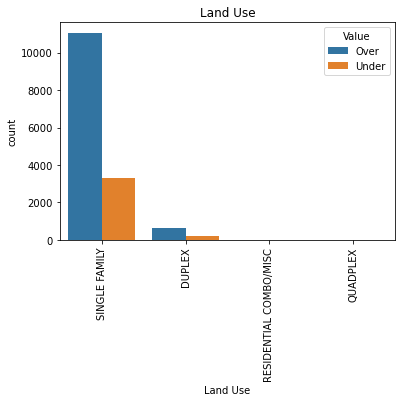

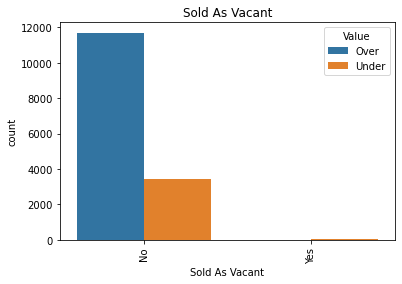

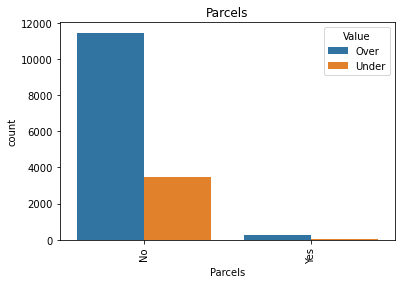

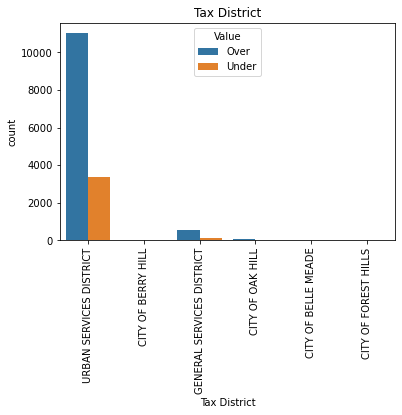

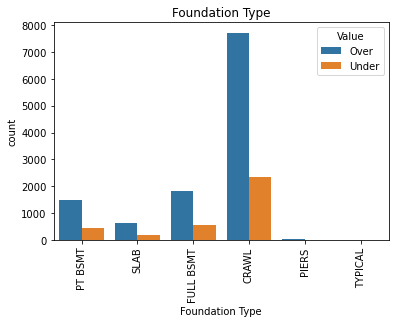

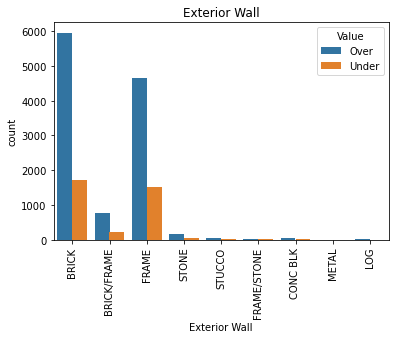

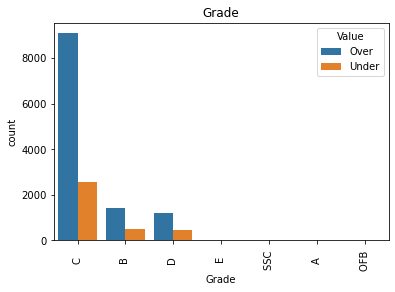

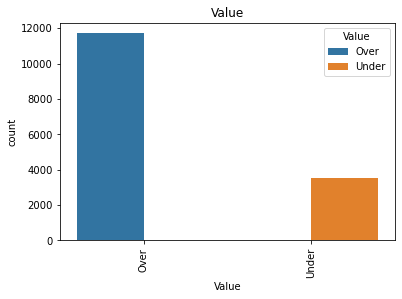

In [166]:
for i in df_ob:
    sns.countplot(x = df[i],hue='Value', data = df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [167]:
df["Foundation Type"].value_counts(normalize=True)

CRAWL        0.661134
FULL BSMT    0.156410
PT BSMT      0.126033
SLAB         0.054389
PIERS        0.001903
TYPICAL      0.000131
Name: Foundation Type, dtype: float64

In [168]:
df["Foundation Type"] = df["Foundation Type"].replace(['PIERS','TYPICAL'], 'Other')
df["Foundation Type"].value_counts(normalize=True)

CRAWL        0.661134
FULL BSMT    0.156410
PT BSMT      0.126033
SLAB         0.054389
Other        0.002034
Name: Foundation Type, dtype: float64

In [169]:
df["Exterior Wall"].value_counts(normalize=True)

BRICK          0.503674
FRAME          0.403359
BRICK/FRAME    0.065149
STONE          0.015090
CONC BLK       0.005249
STUCCO         0.004002
FRAME/STONE    0.002690
LOG            0.000459
METAL          0.000328
Name: Exterior Wall, dtype: float64

In [170]:
df["Exterior Wall"] = df["Exterior Wall"].replace(['STONE','STUCCO','CONC BLK','FRAME/STONE','LOG','METAL'], 'Other')
df["Exterior Wall"].value_counts(normalize=True)

BRICK          0.503674
FRAME          0.403359
BRICK/FRAME    0.065149
Other          0.027818
Name: Exterior Wall, dtype: float64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15242 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Land Use         15242 non-null  object 
 1   Sold As Vacant   15242 non-null  object 
 2   Parcels          15242 non-null  object 
 3   Acreage          15242 non-null  float64
 4   Tax District     15242 non-null  object 
 5   Land Value       15242 non-null  int64  
 6   Building Value   15242 non-null  int64  
 7   Finished Area    15241 non-null  float64
 8   Foundation Type  15242 non-null  object 
 9   Exterior Wall    15242 non-null  object 
 10  Grade            15242 non-null  object 
 11  Bedrooms         15242 non-null  float64
 12  Full Bath        15242 non-null  float64
 13  Half Bath        15171 non-null  float64
 14  Value            15242 non-null  object 
 15  year             15242 non-null  int64  
 16  month            15242 non-null  int64  
 17  date        

In [172]:
df = df.drop(['Land Use','Sold As Vacant','Parcels','Tax District'], axis=1)

In [173]:
df.isnull().sum()

Acreage             0
Land Value          0
Building Value      0
Finished Area       1
Foundation Type     0
Exterior Wall       0
Grade               0
Bedrooms            0
Full Bath           0
Half Bath          71
Value               0
year                0
month               0
date                0
Property_Age        0
dtype: int64

In [174]:
df.shape

(15242, 15)

In [175]:
df=df.dropna()
df.isnull().sum()

Acreage            0
Land Value         0
Building Value     0
Finished Area      0
Foundation Type    0
Exterior Wall      0
Grade              0
Bedrooms           0
Full Bath          0
Half Bath          0
Value              0
year               0
month              0
date               0
Property_Age       0
dtype: int64

In [176]:
df.shape

(15170, 15)

In [177]:
df

,Acreage,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Value,year,month,date,Property_Age
0,0.17,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,Over,2013,1,11,72
1,0.11,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18,13
2,0.17,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18,65
3,0.34,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,2013,1,23,103
4,0.17,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,2013,1,4,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,0.25,24000,104700,1911.00000,CRAWL,BRICK,C,3.0,2.0,0.0,Under,2016,10,28,44
22634,0.25,22500,107300,1888.00000,CRAWL,FRAME,C,3.0,3.0,0.0,Over,2016,10,12,29
22635,0.24,22500,97700,1912.00000,CRAWL,FRAME,C,3.0,3.0,0.0,Over,2016,10,3,27
22649,0.15,40000,204100,1637.00000,CRAWL,FRAME,B,3.0,2.0,1.0,Over,2016,10,28,12


In [178]:
#df = pd.get_dummies(df, drop_first = True, columns=['Land Use','Sold As Vacant','Parcels','Tax District','Foundation Type','Exterior Wall','Value'])
df = pd.get_dummies(df, drop_first = True, columns=['Grade','Foundation Type','Exterior Wall','Value'])


In [179]:
df

,Acreage,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,year,month,date,...,Grade_OFB,Grade_SSC,Foundation Type_FULL BSMT,Foundation Type_Other,Foundation Type_PT BSMT,Foundation Type_SLAB,Exterior Wall_BRICK/FRAME,Exterior Wall_FRAME,Exterior Wall_Other,Value_Under
0,0.17,32000,134400,1149.00000,2.0,1.0,0.0,2013,1,11,...,0,0,0,0,1,0,0,0,0,0
1,0.11,34000,157800,2090.82495,3.0,2.0,1.0,2013,1,18,...,0,0,0,0,0,1,1,0,0,0
2,0.17,25000,243700,2145.60001,4.0,2.0,0.0,2013,1,18,...,0,0,1,0,0,0,1,0,0,1
3,0.34,25000,138100,1969.00000,2.0,1.0,0.0,2013,1,23,...,0,0,0,0,0,0,0,1,0,1
4,0.17,25000,86100,1037.00000,2.0,1.0,0.0,2013,1,4,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,0.25,24000,104700,1911.00000,3.0,2.0,0.0,2016,10,28,...,0,0,0,0,0,0,0,0,0,1
22634,0.25,22500,107300,1888.00000,3.0,3.0,0.0,2016,10,12,...,0,0,0,0,0,0,0,1,0,0
22635,0.24,22500,97700,1912.00000,3.0,3.0,0.0,2016,10,3,...,0,0,0,0,0,0,0,1,0,0
22649,0.15,40000,204100,1637.00000,3.0,2.0,1.0,2016,10,28,...,0,0,0,0,0,0,0,1,0,0


[]

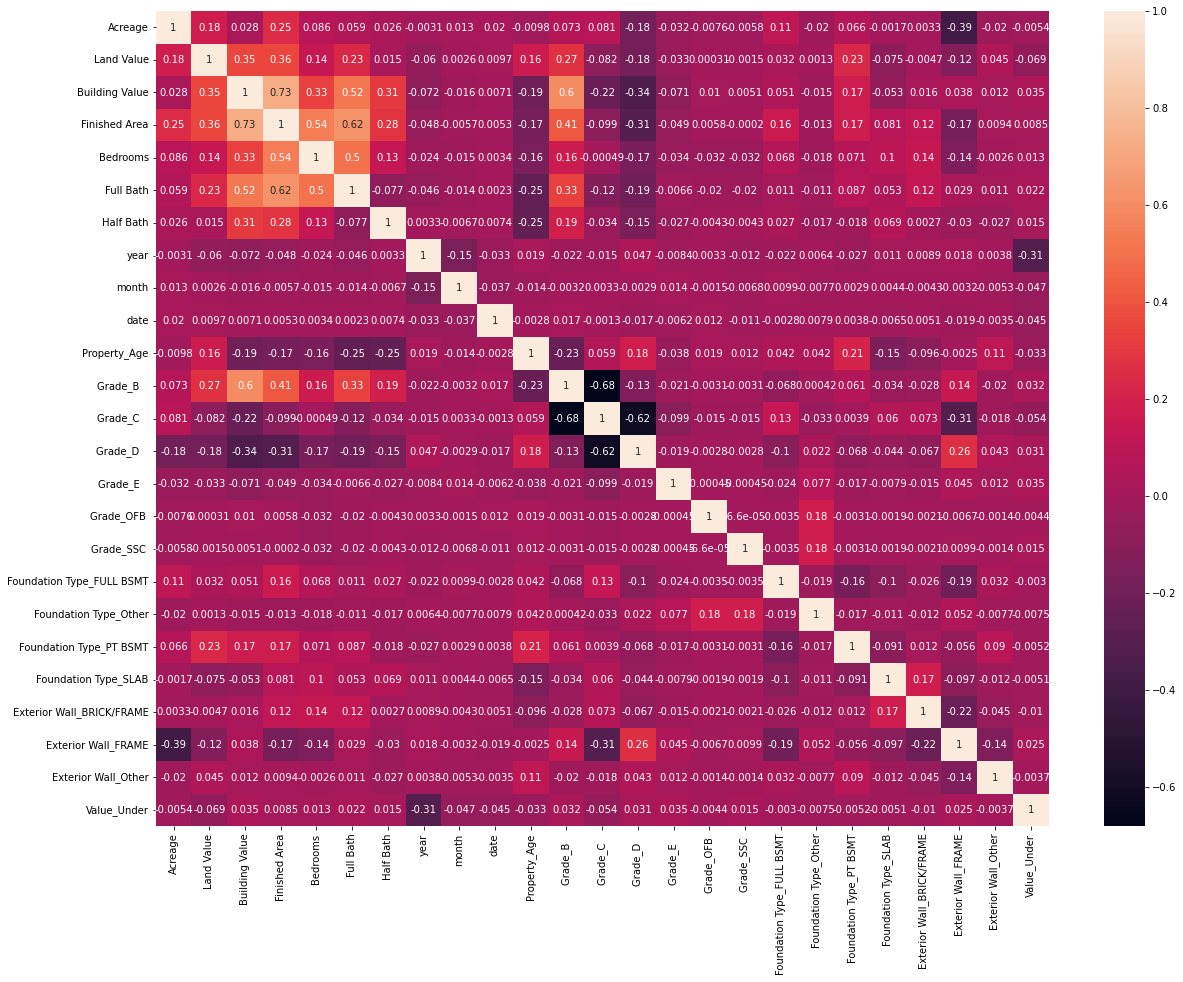

In [180]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [181]:
df.corr()['Value_Under'].sort_values()

year                        -0.312059
Land Value                  -0.068938
Grade_C                     -0.054385
month                       -0.046704
date                        -0.045426
Property_Age                -0.032549
Exterior Wall_BRICK/FRAME   -0.009986
Foundation Type_Other       -0.007470
Acreage                     -0.005429
Foundation Type_PT BSMT     -0.005151
Foundation Type_SLAB        -0.005140
Grade_OFB                   -0.004448
Exterior Wall_Other         -0.003683
Foundation Type_FULL BSMT   -0.003031
Finished Area                0.008482
Bedrooms                     0.013029
Half Bath                    0.014511
Grade_SSC                    0.014820
Full Bath                    0.021965
Exterior Wall_FRAME          0.024944
Grade_D                      0.031276
Grade_B                      0.031986
Grade_E                      0.035226
Building Value               0.035443
Value_Under                  1.000000
Name: Value_Under, dtype: float64

# Creating Data Models

In [183]:
x=df.drop(['Value_Under'],axis=1)
y=df[['Value_Under']]

In [184]:
from sklearn.model_selection import train_test_split
x_train_res, x_test, y_train_res, y_test = train_test_split(x, y, test_size = 0.2, stratify=y ,random_state = 1)

# Part 2: Logistic Regression

In [189]:
from sklearn import metrics
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "lbfgs")
logreg.fit(x_train_res, y_train_res)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression model : {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression model : 0.77


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[2229  105]
 [ 585  115]]


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2334
           1       0.52      0.16      0.25       700

    accuracy                           0.77      3034
   macro avg       0.66      0.56      0.56      3034
weighted avg       0.73      0.77      0.72      3034



# Part 3:  Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_res, y_train_res)
y_pred2 = classifier.predict(x_test)

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[1912  422]
 [ 411  289]]


0.7254449571522742

In [194]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2334
           1       0.41      0.41      0.41       700

    accuracy                           0.73      3034
   macro avg       0.61      0.62      0.62      3034
weighted avg       0.73      0.73      0.73      3034



# Part 4: Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_res, y_train_res)
y_pred3 = classifier.predict(x_test)

/var/folders/xt/7tj5n_ln5nx9s8tyzzw7dw6r0000gn/T/ipykernel_65856/1811700584.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_res, y_train_res)


In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[2257   77]
 [ 536  164]]


0.7979564930784443

In [197]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2334
           1       0.68      0.23      0.35       700

    accuracy                           0.80      3034
   macro avg       0.74      0.60      0.61      3034
weighted avg       0.78      0.80      0.76      3034



In [198]:
classifier.feature_importances_

array([1.00526634e-01, 1.03773716e-01, 1.23731194e-01, 1.17988498e-01,
       3.08018171e-02, 2.39172932e-02, 1.53315710e-02, 1.08449921e-01,
       7.98117611e-02, 9.64364546e-02, 1.25936932e-01, 4.56308792e-03,
       7.46157699e-03, 4.58764156e-03, 1.07352377e-03, 1.95837143e-06,
       3.57026286e-05, 1.22705073e-02, 4.98527803e-04, 1.07129656e-02,
       6.77396092e-03, 7.05749968e-03, 1.38766993e-02, 4.38055538e-03])

In [199]:
feature_importance = pd.DataFrame({'importance': classifier.feature_importances_}, index= x.columns).sort_values('importance')

<AxesSubplot:>

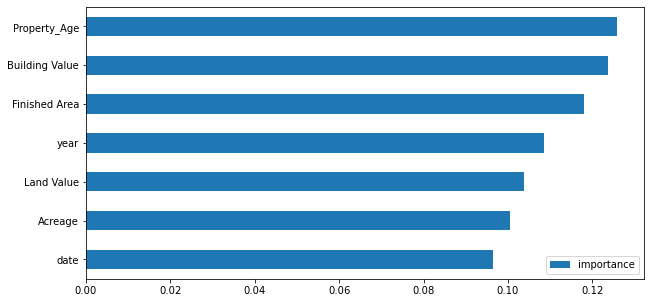

In [226]:
feature_importance=feature_importance[feature_importance.importance>0.080]
feature_importance.plot(kind='barh',figsize=(10,5))

# Part 5: Gradient Boosting

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=8, random_state=0,min_samples_leaf = 50,subsample = 0.8).fit(x_train_res, y_train_res)
y_pred4 = clf.predict(x_test)

/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[2010  324]
 [ 426  274]]


0.7528015820698748

In [216]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2334
           1       0.46      0.39      0.42       700

    accuracy                           0.75      3034
   macro avg       0.64      0.63      0.63      3034
weighted avg       0.74      0.75      0.75      3034



In [217]:
feature_importance2 = pd.DataFrame({'importance': clf.feature_importances_}, index= x.columns).sort_values('importance')

# Part 6: Benchmarking

In [218]:
models = []
models.append(('LoRe', LogisticRegression()))
models.append(('DeTr', DecisionTreeClassifier()))
models.append(('RaFo', RandomForestClassifier(n_estimators=100)))
models.append(('GrBo', GradientBoostingClassifier(n_estimators=100)))

In [230]:
from sklearn.model_selection import KFold, cross_val_score
results = []
name = []
for names, modelb in models:
    kfold = KFold(n_splits=10)
    mod_res = cross_val_score(modelb, x_train_res,y_train_res, cv=kfold, scoring='accuracy')
    results.append(mod_res)
    name.append(names)
    print("%s : %f" %(names, mod_res.mean()))

/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was pass

LoRe : 0.777686
DeTr : 0.719263


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RaFo : 0.793754


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array w

GrBo : 0.793753


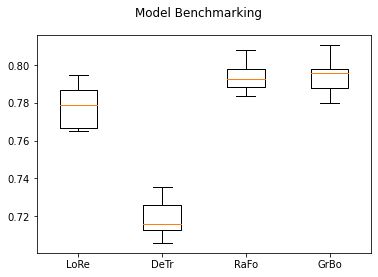

In [231]:
# boxplot algorithm comparison
figu = plt.figure()
figu.suptitle('Model Benchmarking')
ax = figu.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()

In [232]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

result = []
accuracy = []
rmse = []
names = []
for name, model in models:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=3)
    model.fit(x_train_res,y_train_res)
    mod_pred = model.predict(x_test)
    accu = accuracy_score(y_test,mod_pred)
    error = np.sqrt(mean_squared_error(ytest,mod_pred))
    accuracy.append(accu)
    rmse.append(error)
    names.append(name)
    a = pd.DataFrame(accuracy)
    b = pd.DataFrame(rmse)
    print("%s : %f (%f)" %(name, accu,error))


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LoRe : 0.772577 (0.525237)
DeTr : 0.719842 (0.610013)


/var/folders/xt/7tj5n_ln5nx9s8tyzzw7dw6r0000gn/T/ipykernel_65856/3930191081.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_res,y_train_res)


RaFo : 0.796968 (0.528365)


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GrBo : 0.791694 (0.528365)


<Figure size 504x288 with 0 Axes>

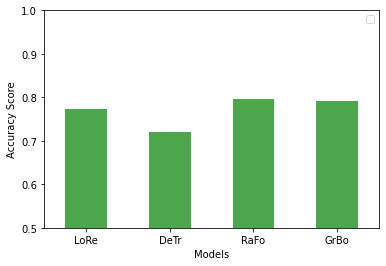

In [233]:
#plot - accuracy
plt.figure(figsize=[7,4])
a.plot(kind='bar', alpha=0.7, color='g', rot=0)
plt.xticks([0,1,2,3], names)
plt.ylim(0.5,1)
plt.xlabel('Models')
plt.ylabel("Accuracy Score")
plt.legend("")
plt.show()

<Figure size 504x288 with 0 Axes>

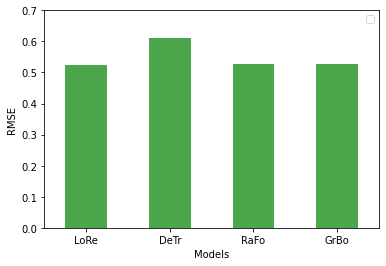

In [234]:
plt.figure(figsize=[7,4])
b.plot(kind='bar', alpha=0.7, color='g', rot=0)
plt.xticks([0,1,2,3], names)
plt.ylim(0,0.7)
plt.xlabel('Models')
plt.ylabel("RMSE")
plt.legend("")
plt.show()

<AxesSubplot:>

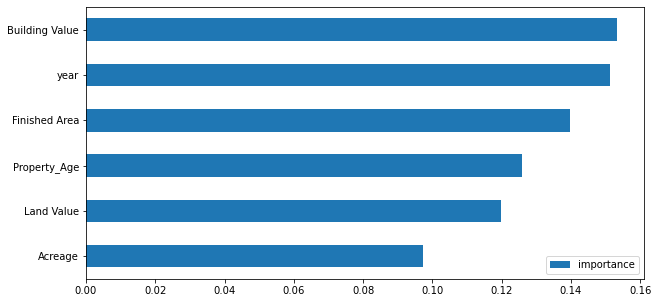

In [229]:
feature_importance2=feature_importance2[feature_importance2.importance>0.080]
feature_importance2.plot(kind='barh',figsize=(10,5))